# Process the images collected from the folder

In [1]:
from os import listdir
from PIL import Image

image_list = []
image_name_size_dict = {}

def image_loader():
    path = './dog-images'
    imageListDir = listdir(path)
    for image in imageListDir:
        img = Image.open(path+'/'+image)
        image_list.append(img)
        image_name_size_dict[image[:7]]=img.size
    return image_list


# Visualize images using matplotlib

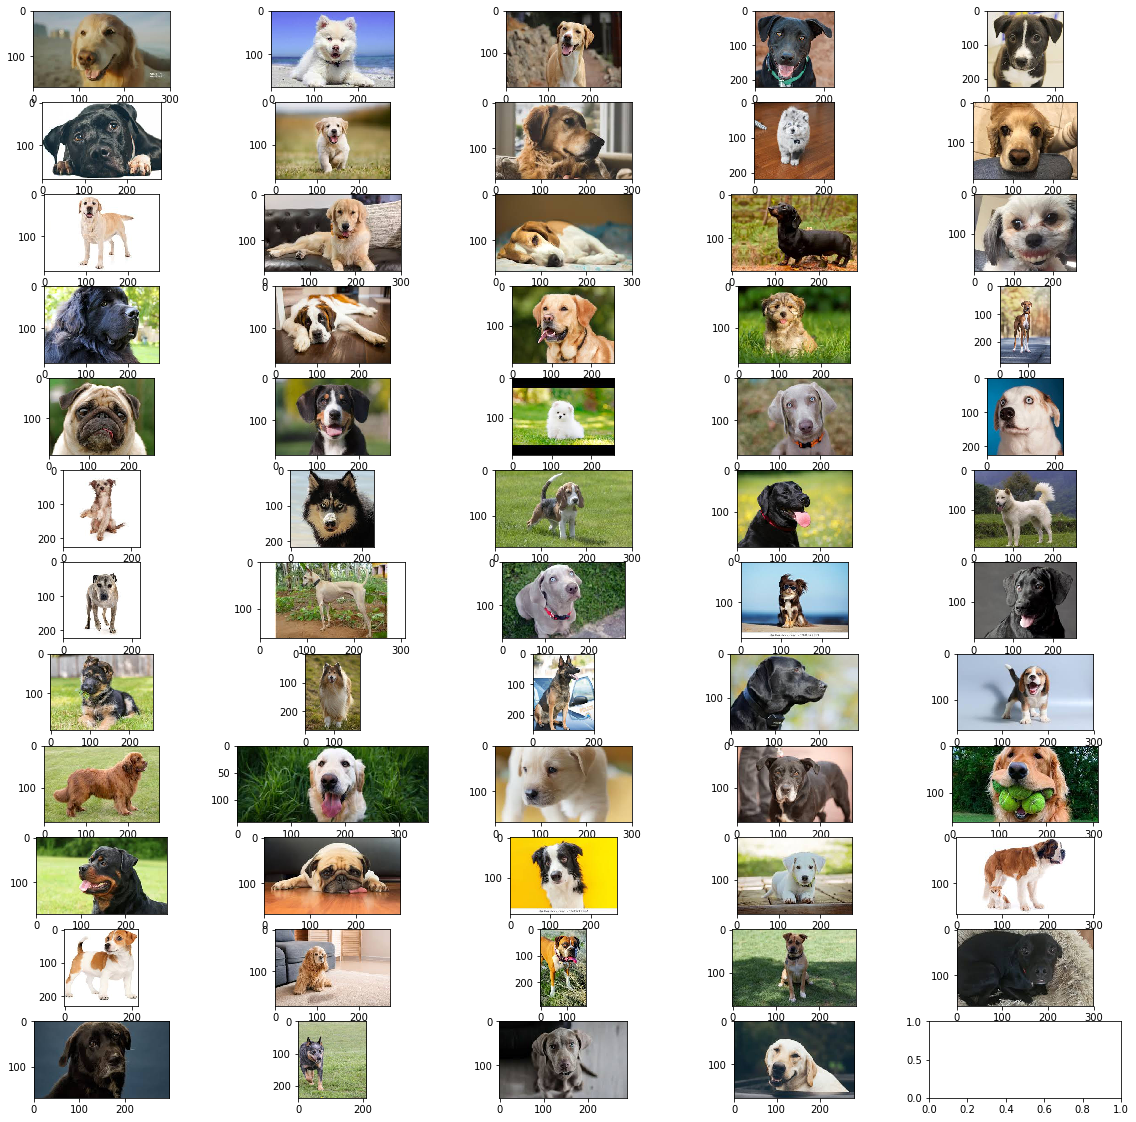

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
image_list = image_loader()

_, axes = plt.subplots(12, 5, figsize=(20, 20))
 
axes = axes.flatten()

for img,ax in zip(image_list, axes):
    ax.imshow(img)
    
plt.show()

# Read the Annotaions JSON

In [3]:
import pandas as pd

json_df = pd.read_json('./Annotations/annotations.json')



# Preparing final DF 

In [4]:
header = {'Image':[],'Image Dim':[], 'Image Norm Dim':[], 'BB-Center':[], 'BB Dim':[], 'IOU':[]}
final_df = pd.DataFrame(columns=header)

list_file_names=[]
for filename in json_df:
    list_file_names.append(filename[:7])
final_df['Image']=list_file_names
final_df['Image Dim']=image_name_size_dict.values()


## Find out X, Y BB Center and H,W  BB Dimensions

In [5]:
df1 = json_df.loc[['regions'],:]

bb_center_list = []
bb_hw_list = []
for i in range(59):
    if df1.loc['regions'][i]!=[]:
        x = df1.loc['regions'][i][0]['shape_attributes']['x']
        
        y = df1.loc['regions'][i][0]['shape_attributes']['y']
        bb_center_list.append((x,y))
        h = df1.loc['regions'][i][0]['shape_attributes']['height']
        
        w = df1.loc['regions'][i][0]['shape_attributes']['width']
        bb_hw_list.append((h,w))
        
    elif df1.loc['regions'][i]==[]:
        bb_center_list.append((0,0))
        bb_hw_list.append((0,0))
    

In [6]:
final_df['BB Dim'] = bb_hw_list
final_df['BB-Center'] = bb_center_list


# Normalizing BB Center w.r.t. Image size

In [7]:
for i in range(59):
    final_df.iloc[:,3][i] = tuple(bb_center/image_dim for bb_center,image_dim in zip(final_df.iloc[:,3][i],final_df.iloc[:,1][i]))

# Normalizing BB Dimensions w.r.t. Image size

In [8]:
for i in range(59):
    final_df.iloc[:,4][i] = tuple(bb_center/image_dim for bb_center,image_dim in zip(final_df.iloc[:,4][i],final_df.iloc[:,1][i]))

# Finding centroid 

In [9]:
for i in range(59):
    final_df.iloc[:,5][i] = tuple((bb_center+image_dim)/2 for bb_center,image_dim in zip(final_df.iloc[:,4][i],final_df.iloc[:,3][i]))

# Print the Metrics

In [10]:
final_df

,Image,Image Dim,Image Norm Dim,BB-Center,BB Dim,IOU
0,img_001,"(300, 168)",NaN,"(0.23, 0.21428571428571427)","(0.4066666666666667, 0.8511904761904762)","(0.31833333333333336, 0.5327380952380952)"
1,img_002,"(284, 177)",NaN,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)"
2,img_003,"(275, 183)",NaN,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)"
3,img_004,"(228, 221)",NaN,"(0.24561403508771928, 0.06787330316742081)","(0.6535087719298246, 0.6244343891402715)","(0.44956140350877194, 0.34615384615384615)"
4,img_005,"(225, 225)",NaN,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)"
5,img_006,"(280, 180)",NaN,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)"
6,img_007,"(275, 183)",NaN,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)"
7,img_008,"(300, 168)",NaN,"(0.08666666666666667, 0.03571428571428571)","(0.4066666666666667, 1.4583333333333333)","(0.24666666666666667, 0.7470238095238095)"
8,img_009,"(230, 219)",NaN,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)"
9,img_010,"(262, 193)",NaN,"(0.15267175572519084, 0.21243523316062177)","(0.8740458015267175, 0.46632124352331605)","(0.5133587786259541, 0.3393782383419689)"


In [11]:
nc_x_bbox = []
nc_y_bbox = []
for i in range(50):
    h,w = final_df.iloc[:,5][i]
    nc_x_bbox.append(h)
    nc_y_bbox.append(w)
    


# Plot the graph using K-Means

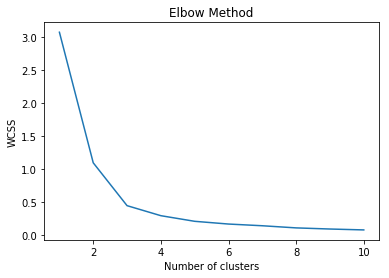

In [21]:
import pandas as pd

df = pd.DataFrame({
    'x': nc_x_bbox,
    'y': nc_y_bbox
})

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



Cluster Centers: [[0.         0.        ]
 [0.41905165 0.37531005]
 [0.34999018 0.63247973]
 [0.60393356 0.26633971]
 [0.37555135 0.5375034 ]
 [0.29853185 0.30988973]
 [0.46343446 0.2984591 ]
 [0.50629407 0.37102695]
 [0.27651515 0.7236534 ]
 [0.40301571 0.46477488]]


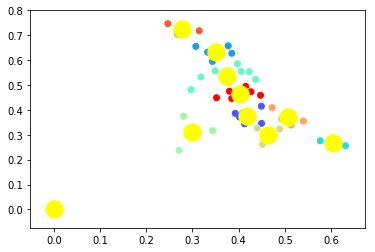

In [22]:
print("Cluster Centers:",kmeans.cluster_centers_)

plt.scatter(nc_x_bbox,nc_y_bbox, c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], s=300, color='yellow')